In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the linear combination
w=[1,2]
b=3

In [3]:
# create data
x=np.linspace(-5,5,100)
y=w[0]*x + w[1]*x + b

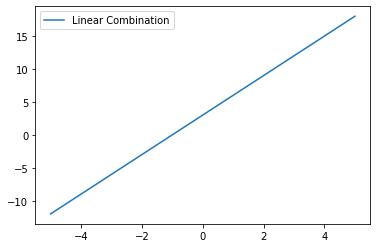

In [4]:
plt.plot(x,y, label='Linear Combination')
plt.legend()
plt.show()

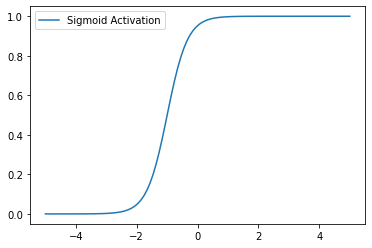

In [5]:
sigmoid = lambda x:1/(1+np.exp(-x))
y_sigmoid = sigmoid(y)
plt.plot(x,y_sigmoid,label='Sigmoid Activation')
plt.legend()
plt.show()

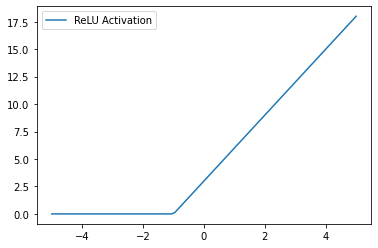

In [6]:
relu = lambda x: np.maximum(x,0)
y_relu = relu(y)
plt.plot(x,y_relu, label='ReLU Activation')
plt.legend()
plt.show()

In [7]:
import tensorflow as tf

In [8]:
import seaborn as sns

In [9]:
plt.style.use('fivethirtyeight')

In [10]:
x=np.linspace(-10,10,100)

In [11]:
def plot_graph(x,y, ALPHA=0.6, label_x=r"$x \rightarrow$", label_y=r'$act(x) \rightarrow$', 
              title=None, LABEL=None):
    plt.figure(figsize=(7,5))
    plt.axhline(y=0, color='black', linestyle='--', lw=2)
    plt.axvline(x=0, color='black', linestyle='--', lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    
    if LABEL != None:
        plt.plot(x,y, alpha = ALPHA, label=LABEL);
        plt.legend(fontsize=14)
        
    else:
        plt.plot(x,y, alpha = ALPHA);

In [12]:
def derivative(f, z, delta_z =1e-6):
    return(f(z+delta_z) - f(z))/(delta_z)

In [13]:
def sigmoid(x):
    return tf.keras.activations.sigmoid(x)

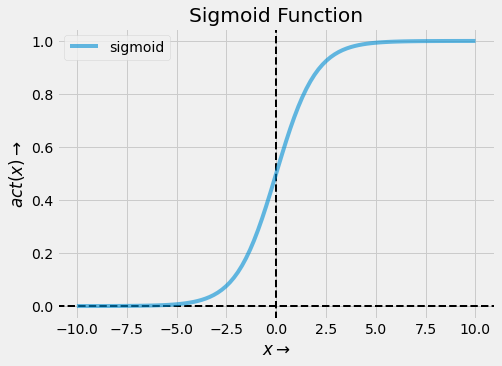

In [14]:
plot_graph(x, sigmoid(x), title='Sigmoid Function', LABEL="sigmoid")

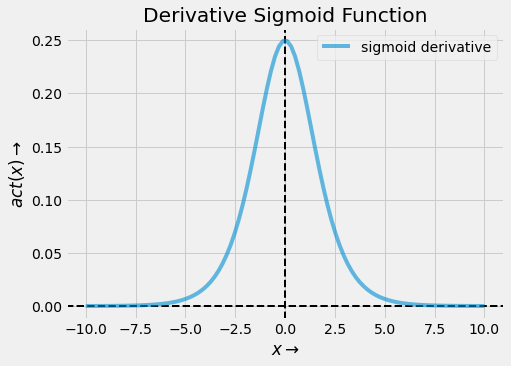

In [15]:
plot_graph(x, derivative(sigmoid, x), title='Derivative Sigmoid Function', LABEL="sigmoid derivative")

In [16]:
def tanh(x):
    return tf.keras.activations.tanh(x)

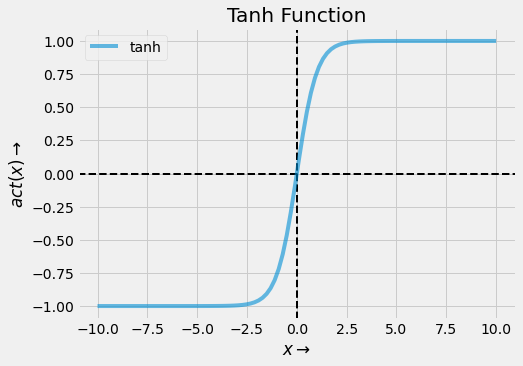

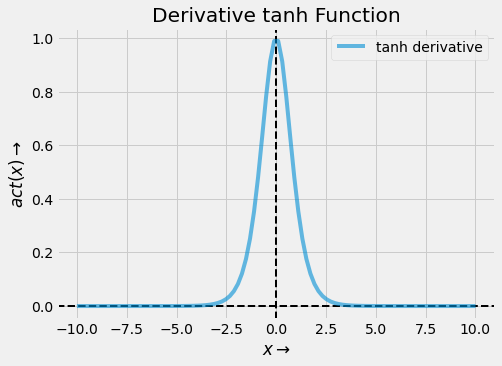

In [17]:
plot_graph(x, tanh(x), title='Tanh Function', LABEL="tanh")
plot_graph(x, derivative(tanh, x), title='Derivative tanh Function', LABEL="tanh derivative")

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import keras

In [4]:
print(f'Tensorflow version {tf.__version__}')

Tensorflow version 2.13.0


In [6]:
print(f'keras version {keras.__version__}')

keras version 2.13.1


In [25]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
os.getcwd()

'C:\\Users\\rames'

In [11]:
check_list = ['GPU', 'CPU']
for device in check_list:
    out = tf.config.list_physical_devices(device)
    if len(out) > 0:
        print(f'{device} is available')
        print(f"Details >> {out}")
    else:
        print(f"{device} isn't available")

GPU isn't available
CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [12]:
mnist = tf.keras.datasets.mnist

In [13]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\rames\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [15]:
mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [17]:
x_train_full.shape

(60000, 28, 28)

In [19]:
y_train_full.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

In [22]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
x_train_full[0].shape

(28, 28)

In [25]:
print(f"data type of x_train_full: {x_train_full.dtype}, \n shape of x_train_full: {x_train_full.shape}")

data type of x_train_full: uint8, 
 shape of x_train_full: (60000, 28, 28)


In [26]:
len(x_test[1][0])

28

In [27]:
y_train_full[0]

5

In [28]:
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255

In [29]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [30]:
x_test = x_test/255

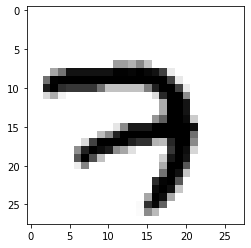

In [31]:
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [32]:
y_train[0]

7

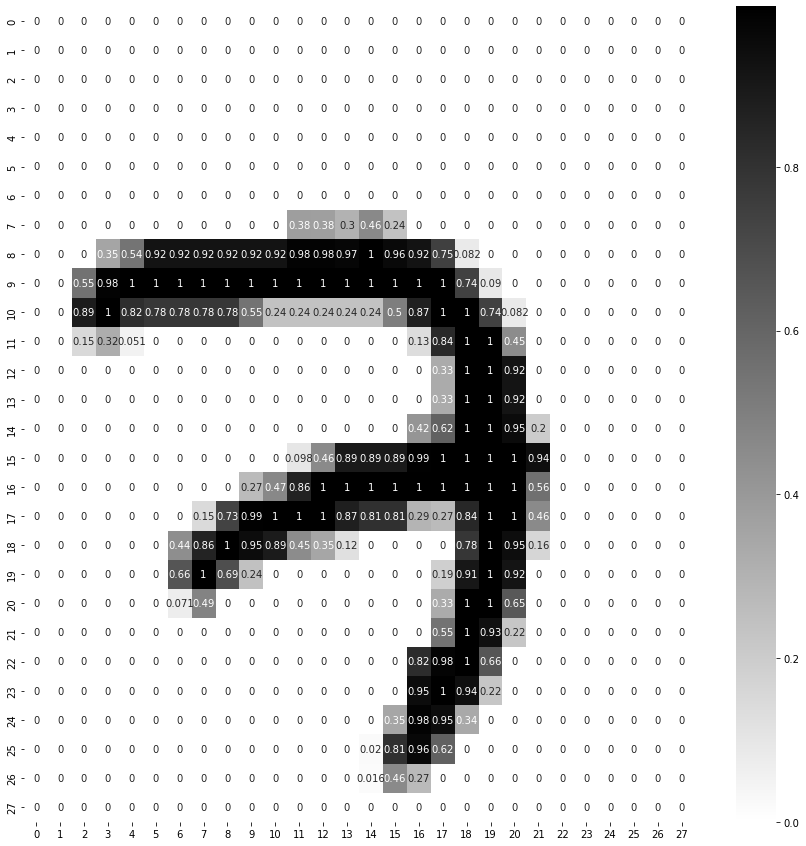

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot= True, cmap='binary');

In [35]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name = 'inputLayer'),
         tf.keras.layers.Dense(300, activation='relu', name='hiddenlayer1'),
         tf.keras.layers.Dense(100, activation='relu', name='hiddenlayer2'),
         tf.keras.layers.Dense(10, activation='softmax', name='outputlayer')]

In [36]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [37]:
model_clf.layers

In [38]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
hidden1 = model_clf.layers[1]

In [41]:
hidden1.name

'hiddenlayer1'

In [42]:
hidden1.get_weights()

[array([[ 0.00214022,  0.00436864, -0.0166433 , ..., -0.04337242,
          0.05151224, -0.04077924],
        [-0.0490261 , -0.00756952,  0.06489356, ..., -0.00705852,
          0.00377078, -0.01371415],
        [-0.00034204, -0.06622539, -0.04921737, ..., -0.03598051,
         -0.0610643 , -0.0711621 ],
        ...,
        [-0.07368463,  0.07338224,  0.05524948, ..., -0.06653307,
         -0.03179257,  0.01946969],
        [ 0.02300965,  0.04037668,  0.04513592, ...,  0.03041693,
          0.00719792,  0.06772071],
        [-0.02583992, -0.07011335, -0.02898628, ...,  0.03543448,
         -0.03014396, -0.00530378]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [43]:
hidden1.get_weights()[0]

array([[ 0.00214022,  0.00436864, -0.0166433 , ..., -0.04337242,
         0.05151224, -0.04077924],
       [-0.0490261 , -0.00756952,  0.06489356, ..., -0.00705852,
         0.00377078, -0.01371415],
       [-0.00034204, -0.06622539, -0.04921737, ..., -0.03598051,
        -0.0610643 , -0.0711621 ],
       ...,
       [-0.07368463,  0.07338224,  0.05524948, ..., -0.06653307,
        -0.03179257,  0.01946969],
       [ 0.02300965,  0.04037668,  0.04513592, ...,  0.03041693,
         0.00719792,  0.06772071],
       [-0.02583992, -0.07011335, -0.02898628, ...,  0.03543448,
        -0.03014396, -0.00530378]], dtype=float32)

In [44]:
hidden1.get_weights()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
weights, biases = hidden1.get_weights()

In [46]:
weights

array([[ 0.00214022,  0.00436864, -0.0166433 , ..., -0.04337242,
         0.05151224, -0.04077924],
       [-0.0490261 , -0.00756952,  0.06489356, ..., -0.00705852,
         0.00377078, -0.01371415],
       [-0.00034204, -0.06622539, -0.04921737, ..., -0.03598051,
        -0.0610643 , -0.0711621 ],
       ...,
       [-0.07368463,  0.07338224,  0.05524948, ..., -0.06653307,
        -0.03179257,  0.01946969],
       [ 0.02300965,  0.04037668,  0.04513592, ...,  0.03041693,
         0.00719792,  0.06772071],
       [-0.02583992, -0.07011335, -0.02898628, ...,  0.03543448,
        -0.03014396, -0.00530378]], dtype=float32)

In [47]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
LOSS_FUNCTION = 'sparse_categorical_crossentropy'

In [49]:
OPTIMIZER = 'SGD'

In [50]:
METRICS = ['accuracy']

In [51]:
model_clf.compile(loss=LOSS_FUNCTION, optimizer = OPTIMIZER, metrics= METRICS)

In [52]:
# Training
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

In [53]:
history = model_clf.fit(x_train, y_train, epochs= EPOCHS, validation_data= VALIDATION_SET, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 16s 8ms/step - loss: 0.5977 - accuracy: 0.8469 - val_loss: 0.3074 - val_accuracy: 0.9150
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2909 - accuracy: 0.9179 - val_loss: 0.2459 - val_accuracy: 0.9306
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2382 - accuracy: 0.9322 - val_loss: 0.2156 - val_accuracy: 0.9402
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2040 - accuracy: 0.9423 - val_loss: 0.1803 - val_accuracy: 0.9504
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1779 - accuracy: 0.9496 - val_loss: 0.1619 - val_accuracy: 0.9562
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1576 - accuracy: 0.9556 - val_loss: 0.1456 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1409 - accuracy: 0.9603 - val_loss: 0.1378 - val_ac

In [55]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [56]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.597720,0.846945,0.307425,0.9150
1,0.290923,0.917945,0.245913,0.9306
2,0.238174,0.932164,0.215566,0.9402
3,0.204049,0.942273,0.180333,0.9504
4,0.177859,0.949618,0.161900,0.9562
5,0.157590,0.955564,0.145629,0.9606
6,0.140948,0.960327,0.137841,0.9642
7,0.127454,0.963982,0.126727,0.9660
8,0.115792,0.967291,0.117565,0.9686
9,0.105935,0.970600,0.113429,0.9694


<AxesSubplot:>

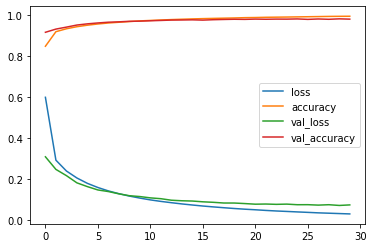

In [57]:
pd.DataFrame(history.history).plot()

In [58]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0725 - accuracy: 0.9769


[0.07249196618795395, 0.9768999814987183]

In [59]:
x_new = x_test[:3]

In [60]:
actual = y_test[:3]

In [61]:
actual

array([7, 2, 1], dtype=uint8)

In [62]:
y_prob = model_clf.predict(x_new)

1/1 [==============================] - 0s 212ms/step


In [63]:
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [64]:
y_prob

array([[2.3810037e-07, 1.1638309e-07, 2.1725504e-05, 3.4073633e-04,
        6.9618733e-09, 2.2583397e-06, 5.9817758e-12, 9.9961156e-01,
        1.3227031e-05, 1.0255180e-05],
       [5.3298564e-08, 1.5122087e-04, 9.9983025e-01, 1.4509693e-05,
        2.8896883e-13, 2.0939966e-08, 9.0573218e-07, 1.6901626e-10,
        2.9792989e-06, 2.5552451e-12],
       [1.5748503e-06, 9.9785054e-01, 3.6478488e-04, 3.5308698e-05,
        5.3934869e-04, 2.2854674e-05, 2.0398578e-05, 6.8125932e-04,
        4.4529489e-04, 3.8735809e-05]], dtype=float32)

In [65]:
y_pred = np.argmax(y_prob, axis=-1)

In [66]:
y_pred

array([7, 2, 1], dtype=int64)

In [67]:
actual

array([7, 2, 1], dtype=uint8)

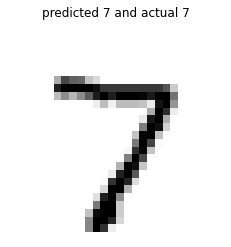

##########


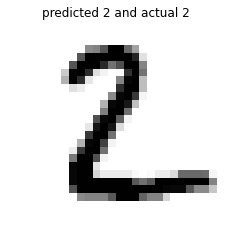

##########


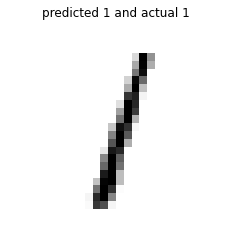

##########


In [68]:
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap='binary')
    plt.title(f'predicted {pred} and actual {actual_data}')
    plt.axis('off')
    plt.show()
    print('##########')